# Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf

In [2]:
%precision 3
pd.set_option( 'precision', 3 )
%matplotlib inline

In [3]:
from matplotlib import font_manager, rc
font_path = 'c://Windows//Fonts//malgun.ttf' # 폰트 파일 위치
font_name = font_manager.FontProperties( fname = font_path ).get_name()
rc( 'font', family = font_name )

## Dataset 준비

In [4]:
auto_mpg = pd.read_csv( './/auto-mpg.csv', header = None )
auto_mpg.columns = [ 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
               'acceleration', 'model year', 'origin', 'name' ]

In [5]:
auto_mpg.shape

(398, 9)

In [6]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
auto_mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


In [9]:
auto_mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000,398.000,398.000,398.000,398.000,398.000,398.000
mean,23.515,5.455,193.426,2970.425,15.566,76.010,1.573
std,7.816,1.701,104.270,846.842,2.764,3.698,0.802
min,9.000,3.000,68.000,1613.000,8.000,70.000,1.000
25%,17.500,4.000,104.250,2223.750,13.825,73.000,1.000
50%,23.000,4.000,148.500,2803.500,15.500,76.000,1.000
75%,29.000,8.000,262.000,3608.000,17.175,79.000,2.000
max,46.600,8.000,455.000,5140.000,24.800,82.000,3.000


In [10]:
auto_mpg[  'horsepower' ].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '?', '215.0', '225.0',
       '190.0', '170.0', '160.0', '95.00', '97.00', '85.00', '88.00',
       '46.00', '87.00', '90.00', '113.0', '200.0', '210.0', '193.0',
       '100.0', '105.0', '175.0', '153.0', '180.0', '110.0', '72.00',
       '86.00', '70.00', '76.00', '65.00', '69.00', '60.00', '80.00',
       '54.00', '208.0', '155.0', '112.0', '92.00', '145.0', '137.0',
       '158.0', '167.0', '94.00', '107.0', '230.0', '49.00', '75.00',
       '91.00', '122.0', '67.00', '83.00', '78.00', '52.00', '61.00',
       '93.00', '148.0', '129.0', '96.00', '71.00', '98.00', '115.0',
       '53.00', '81.00', '79.00', '120.0', '152.0', '102.0', '108.0',
       '68.00', '58.00', '149.0', '89.00', '63.00', '48.00', '66.00',
       '139.0', '103.0', '125.0', '133.0', '138.0', '135.0', '142.0',
       '77.00', '62.00', '132.0', '84.00', '64.00', '74.00', '116.0',
       '82.00'], dtype=object)

In [11]:
auto_mpg[ 'horsepower' ].replace( '?', np.nan, inplace = True ) 
auto_mpg.dropna( subset = [ 'horsepower' ], axis = 0, inplace = True ) 
auto_mpg[ 'horsepower' ] = auto_mpg[ 'horsepower' ].astype( 'float' ) 

In [12]:
auto_mpg[ 'origin' ].replace( { 1:'USA', 2:'EU', 3:'JPN' }, inplace = True )
auto_mpg[ 'origin' ] = auto_mpg[ 'origin' ].astype( 'category' )
auto_mpg[ 'model year' ] = auto_mpg[ 'model year' ].astype( 'category' )
auto_mpg[ 'cylinders' ] = auto_mpg[ 'cylinders' ].astype( 'category' )

In [13]:
count, bin_dividers = np.histogram( auto_mpg[ 'horsepower' ], bins = 3 )
count, bin_dividers

(array([257, 103,  31], dtype=int64),
 array([ 46.   , 107.333, 168.667, 230.   ]))

In [14]:
bin_names = [ '저출력', '보통출력', '고출력' ]

auto_mpg[ 'hp_bin' ] = pd.cut( x = auto_mpg[ 'horsepower' ],  # 데이터 배열 
                               bins = bin_dividers,     # 경계값 리스트
                               labels = bin_names,      # bin 이름
                               include_lowest = True )  # 첫 경계값 포함

In [15]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           391 non-null    float64 
 1   cylinders     391 non-null    category
 2   displacement  391 non-null    float64 
 3   horsepower    391 non-null    float64 
 4   weight        391 non-null    float64 
 5   acceleration  391 non-null    float64 
 6   model year    391 non-null    category
 7   origin        391 non-null    category
 8   name          391 non-null    object  
 9   hp_bin        391 non-null    category
dtypes: category(4), float64(5), object(1)
memory usage: 24.0+ KB


In [16]:
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,hp_bin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu,보통출력
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320,보통출력
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite,보통출력
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst,보통출력
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino,보통출력


In [17]:
auto_mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,hp_bin
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,ford mustang gl,저출력
394,44.0,4,97.0,52.0,2130.0,24.6,82,EU,vw pickup,저출력
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,dodge rampage,저출력
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,ford ranger,저출력
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA,chevy s-10,저출력


In [18]:
auto_mpg.describe()

,mpg,displacement,horsepower,weight,acceleration
count,391.00,391.000,391.000,391.000,391.000
mean,23.47,193.748,104.174,2974.064,15.558
std,7.80,103.948,38.093,847.623,2.742
min,9.00,68.000,46.000,1613.000,8.000
25%,17.25,105.000,75.000,2224.500,13.800
50%,23.00,151.000,93.000,2800.000,15.500
75%,29.00,264.500,125.000,3611.000,17.050
max,46.60,455.000,230.000,5140.000,24.800


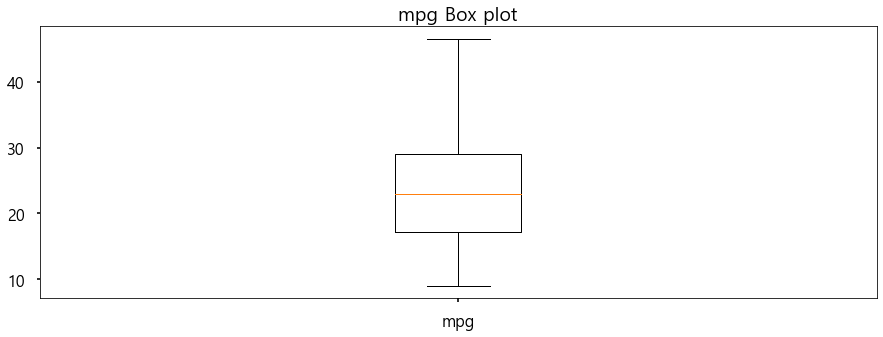

In [19]:
plt.style.use( 'seaborn-poster' )              # 스타일 서식 지정
plt.rcParams[ 'axes.unicode_minus' ] = False   # 마이너스 부호 출력 설정

fig = plt.figure( figsize = ( 15, 5 ) )   
ax = fig.add_subplot( 1, 1, 1 )

ax.boxplot( x = [ auto_mpg[ 'mpg'] ],
            labels = [ 'mpg' ] )

ax.set_title( 'mpg Box plot' )

plt.show()

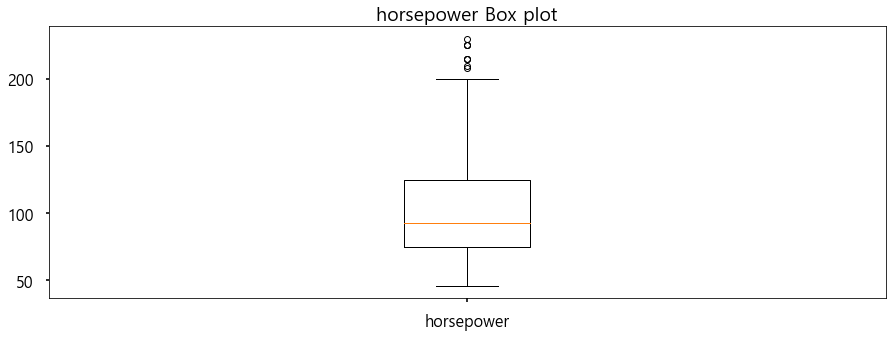

In [20]:
plt.style.use( 'seaborn-poster' )              # 스타일 서식 지정
plt.rcParams[ 'axes.unicode_minus' ] = False   # 마이너스 부호 출력 설정

fig = plt.figure( figsize = ( 15, 5 ) )   
ax = fig.add_subplot( 1, 1, 1 )

ax.boxplot( x = [ auto_mpg[ 'horsepower'] ],
            labels = [ 'horsepower' ] )

ax.set_title( 'horsepower Box plot' )

plt.show()

In [21]:
auto_mpg[ 'mpg' ].value_counts()

13.0    20
14.0    18
18.0    17
15.0    16
26.0    14
        ..
30.7     1
31.9     1
44.0     1
28.8     1
27.4     1
Name: mpg, Length: 127, dtype: int64

In [23]:
auto_mpg[ 'mpg' ].value_counts()

13.0    20
14.0    18
18.0    17
15.0    16
26.0    14
        ..
30.7     1
31.9     1
44.0     1
28.8     1
27.4     1
Name: mpg, Length: 127, dtype: int64

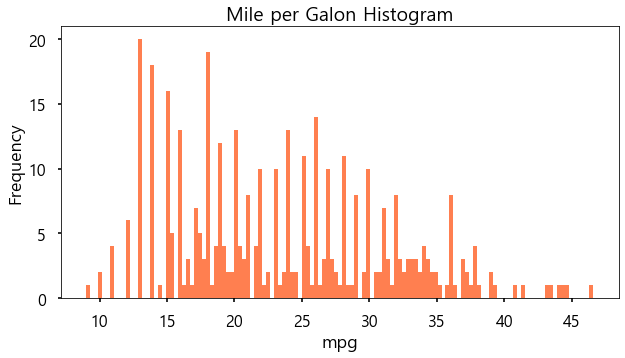

In [24]:
auto_mpg[ 'mpg' ].plot( kind = 'hist', bins = 127, color = 'coral', figsize = ( 10, 5 ) )

plt.title( 'Mile per Galon Histogram' )
plt.xlabel( 'mpg' )

plt.show()

In [25]:
cylinders = auto_mpg[ 'cylinders' ].value_counts()
cylinders

4    199
8    102
6     83
3      4
5      3
Name: cylinders, dtype: int64

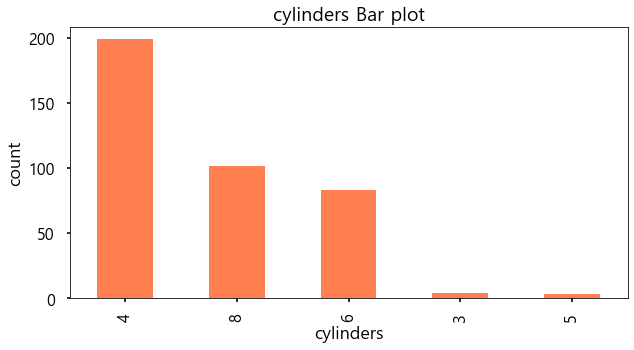

In [26]:
cylinders.plot( kind = 'bar', color = 'coral', figsize = ( 10, 5 ) )

plt.title( 'cylinders Bar plot' )
plt.xlabel( 'cylinders' )
plt.ylabel( 'count' )

plt.show()

In [27]:
auto_mpg[ 'horsepower' ].value_counts()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
94.0      1
167.0     1
158.0     1
137.0     1
107.0     1
Name: horsepower, Length: 92, dtype: int64

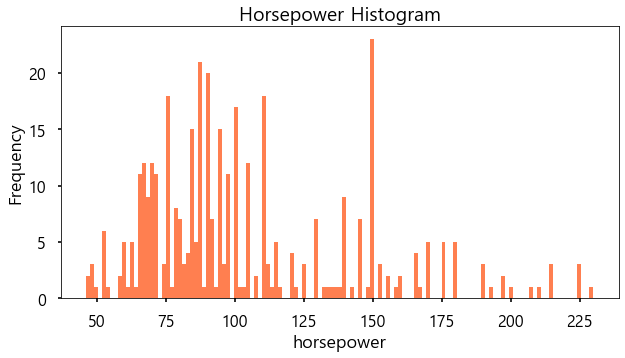

In [28]:
auto_mpg[ 'horsepower' ].plot( kind = 'hist', bins = 127, color = 'coral', figsize = ( 10, 5 ) )

plt.title( 'Horsepower Histogram' )
plt.xlabel( 'horsepower' )

plt.show()

### 상관분석

In [29]:
auto_mpg.corr()

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000,-0.805,-0.780,-0.832,0.420
displacement,-0.805,1.000,0.896,0.933,-0.537
horsepower,-0.780,0.896,1.000,0.865,-0.684
weight,-0.832,0.933,0.865,1.000,-0.411
acceleration,0.420,-0.537,-0.684,-0.411,1.000


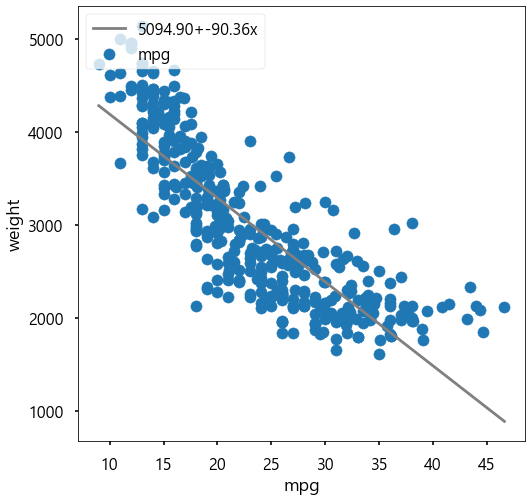

In [30]:
# 계수 b와 W를 구한다
poly_fit = np.polyfit( auto_mpg[ 'mpg' ], auto_mpg[ 'weight' ], 1 )
# b + WX를 반환하는 함수를 작성
poly_1d = np.poly1d( poly_fit )
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace( auto_mpg[ 'mpg' ].min(), auto_mpg[ 'mpg' ].max() )
# xs에 대응하는 y좌표를 구한다
ys = poly_1d( xs )

fig = plt.figure( figsize = ( 8, 8 ) )
ax = fig.add_subplot( 111 )
ax.set_xlabel( 'mpg' )
ax.set_ylabel( 'weight' )
ax.scatter( auto_mpg[ 'mpg' ], auto_mpg[ 'weight' ], label = 'mpg' )
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend( loc = 'upper left' )

plt.show()

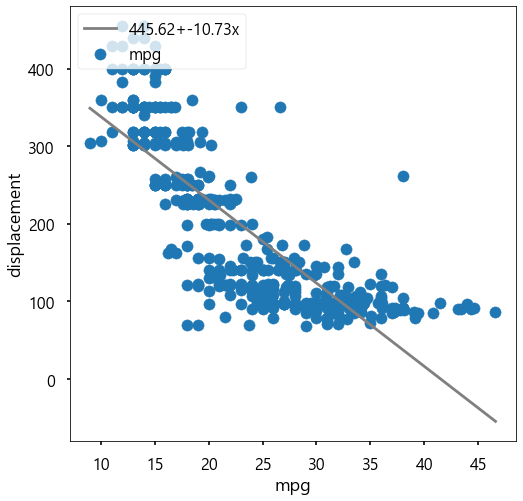

In [31]:
# 계수 b와 W를 구한다
poly_fit = np.polyfit( auto_mpg[ 'mpg' ], auto_mpg[ 'displacement' ], 1 )
# b + WX를 반환하는 함수를 작성
poly_1d = np.poly1d( poly_fit )
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace( auto_mpg[ 'mpg' ].min(), auto_mpg[ 'mpg' ].max() )
# xs에 대응하는 y좌표를 구한다
ys = poly_1d( xs )

fig = plt.figure( figsize = ( 8, 8 ) )
ax = fig.add_subplot( 111 )
ax.set_xlabel( 'mpg' )
ax.set_ylabel( 'displacement' )
ax.scatter( auto_mpg[ 'mpg' ], auto_mpg[ 'displacement' ], label = 'mpg' )
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend( loc = 'upper left' )

plt.show()

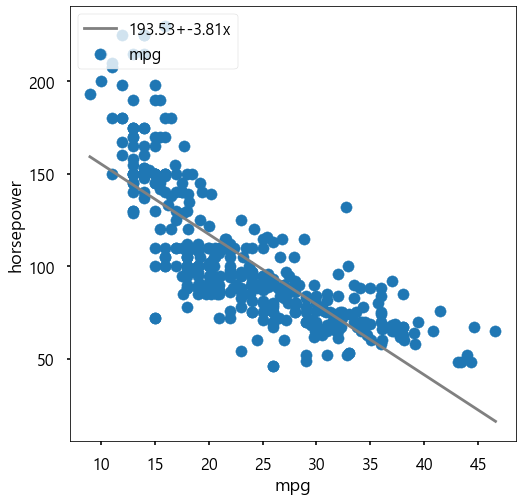

In [32]:
# 계수 b와 W를 구한다
poly_fit = np.polyfit( auto_mpg[ 'mpg' ], auto_mpg[ 'horsepower' ], 1 )
# b + WX를 반환하는 함수를 작성
poly_1d = np.poly1d( poly_fit )
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace( auto_mpg[ 'mpg' ].min(), auto_mpg[ 'mpg' ].max() )
# xs에 대응하는 y좌표를 구한다
ys = poly_1d( xs )

fig = plt.figure( figsize = ( 8, 8 ) )
ax = fig.add_subplot( 111 )
ax.set_xlabel( 'mpg' )
ax.set_ylabel( 'horsepower' )
ax.scatter( auto_mpg[ 'mpg' ], auto_mpg[ 'horsepower' ], label = 'mpg' )
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend( loc = 'upper left' )

plt.show()

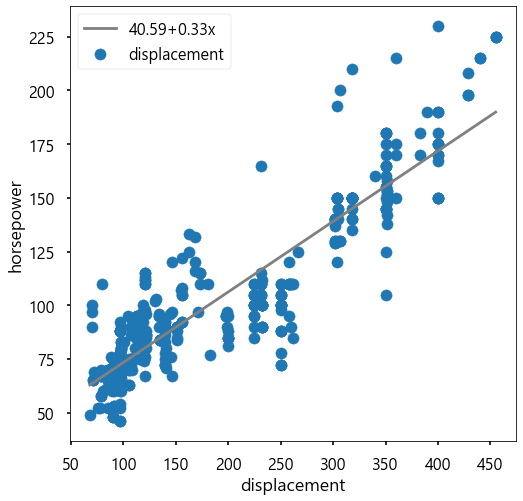

In [33]:
# 계수 b와 W를 구한다
poly_fit = np.polyfit( auto_mpg[ 'displacement' ], auto_mpg[ 'horsepower' ], 1 )
# b + WX를 반환하는 함수를 작성
poly_1d = np.poly1d( poly_fit )
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace( auto_mpg[ 'displacement' ].min(), auto_mpg[ 'displacement' ].max() )
# xs에 대응하는 y좌표를 구한다
ys = poly_1d( xs )

fig = plt.figure( figsize = ( 8, 8 ) )
ax = fig.add_subplot( 111 )
ax.set_xlabel( 'displacement' )
ax.set_ylabel( 'horsepower' )
ax.scatter( auto_mpg[ 'displacement' ], auto_mpg[ 'horsepower' ], label = 'displacement' )
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend( loc = 'upper left' )

plt.show()

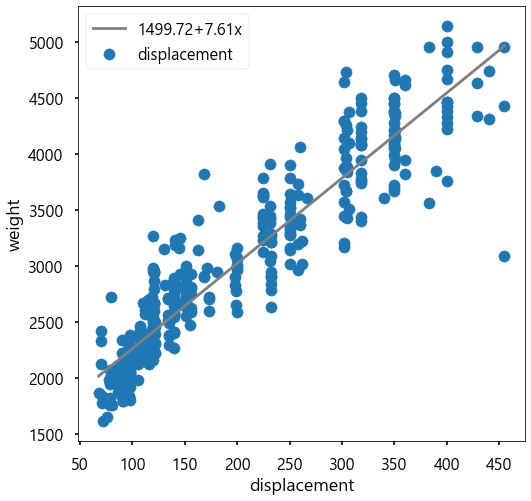

In [34]:
# 계수 b와 W를 구한다
poly_fit = np.polyfit( auto_mpg[ 'displacement' ], auto_mpg[ 'weight' ], 1 )
# b + WX를 반환하는 함수를 작성
poly_1d = np.poly1d( poly_fit )
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace( auto_mpg[ 'displacement' ].min(), auto_mpg[ 'displacement' ].max() )
# xs에 대응하는 y좌표를 구한다
ys = poly_1d( xs )

fig = plt.figure( figsize = ( 8, 8 ) )
ax = fig.add_subplot( 111 )
ax.set_xlabel( 'displacement' )
ax.set_ylabel( 'weight' )
ax.scatter( auto_mpg[ 'displacement' ], auto_mpg[ 'weight' ], label = 'displacement' )
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend( loc = 'upper left' )

plt.show()

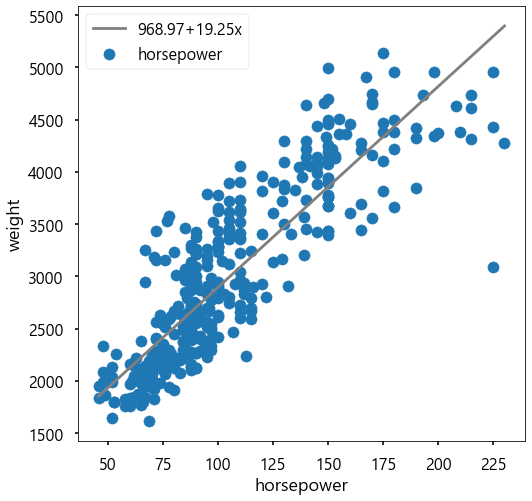

In [35]:
# 계수 b와 W를 구한다
poly_fit = np.polyfit( auto_mpg[ 'horsepower' ], auto_mpg[ 'weight' ], 1 )
# b + WX를 반환하는 함수를 작성
poly_1d = np.poly1d( poly_fit )
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace( auto_mpg[ 'horsepower' ].min(), auto_mpg[ 'horsepower' ].max() )
# xs에 대응하는 y좌표를 구한다
ys = poly_1d( xs )

fig = plt.figure( figsize = ( 8, 8 ) )
ax = fig.add_subplot( 111 )
ax.set_xlabel( 'horsepower' )
ax.set_ylabel( 'weight' )
ax.scatter( auto_mpg[ 'horsepower' ], auto_mpg[ 'weight' ], label = 'horsepower' )
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend( loc = 'upper left' )

plt.show()

## Linear Regression

### 단순 선형 회귀 모델

In [36]:
formula = 'auto_mpg[ "mpg" ] ~ auto_mpg[ "weight" ]'
result = smf.ols(formula, auto_mpg).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        auto_mpg["mpg"]   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     872.0
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          2.19e-101
Time:                        10:24:48   Log-Likelihood:                -1127.6
No. Observations:                 391   AIC:                             2259.
Df Residuals:                     389   BIC:                             2267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             46.2296      0.801     57.691      0.000      44.654      47.805
auto_mpg["weight"]    -0.0077      0.000    -29.530      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.445   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.459
Skew:                           0.726   Prob(JB):                     1.23e-13
Kurtosis:                       4.241   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
formula = 'auto_mpg[ "mpg" ] ~ auto_mpg[ "displacement" ]'
result = smf.ols(formula, auto_mpg).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        auto_mpg["mpg"]   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     717.8
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           2.38e-90
Time:                        11:07:08   Log-Likelihood:                -1153.1
No. Observations:                 391   AIC:                             2310.
Df Residuals:                     389   BIC:                             2318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   35.1784      0.496     70.952      0.000      34.204      36.153
auto_mpg["displacement"]    -0.0604      0.002    -26.791      0.000      -0.065      -0.056
==============================================================================
Omnibus:                       41.327   Durbin-Watson:                   0.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.685
Skew:                           0.706   Prob(JB):                     4.03e-14
Kurtosis:                       4.338   Cond. No.                         465.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
formula = 'auto_mpg[ "mpg" ] ~ auto_mpg[ "horsepower" ]'
result = smf.ols(formula, auto_mpg).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        auto_mpg["mpg"]   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     602.9
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           4.47e-81
Time:                        11:07:54   Log-Likelihood:                -1174.5
No. Observations:                 391   AIC:                             2353.
Df Residuals:                     389   BIC:                             2361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 40.1008      0.721     55.611      0.000      38.683      41.519
auto_mpg["horsepower"]    -0.1596      0.007    -24.553      0.000      -0.172      -0.147
==============================================================================
Omnibus:                       16.292   Durbin-Watson:                   0.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.152
Skew:                           0.487   Prob(JB):                     0.000189
Kurtosis:                       3.323   Cond. No.                         323.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
formula = 'auto_mpg[ "displacement" ] ~ auto_mpg[ "horsepower" ]'
result = smf.ols(formula, auto_mpg).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     auto_mpg["displacement"]   R-squared:                       0.802
Model:                                  OLS   Adj. R-squared:                  0.802
Method:                       Least Squares   F-statistic:                     1576.
Date:                      Thu, 02 Jul 2020   Prob (F-statistic):          6.73e-139
Time:                              11:08:31   Log-Likelihood:                -2053.4
No. Observations:                       391   AIC:                             4111.
Df Residuals:                           389   BIC:                             4119.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -60.8402      6.827     -8.912      0.000     -74.262     -47.419
auto_mpg["horsepower"]     2.4439      0.062     39.703      0.000       2.323       2.565
==============================================================================
Omnibus:                        2.707   Durbin-Watson:                   1.106
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                2.913
Skew:                           0.019   Prob(JB):                        0.233
Kurtosis:                       3.421   Cond. No.                         323.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 가장 적합한 회귀 모델( Durbin-Watson, DW 값이 1.5 ~ 2.5에 가장 근접 )

In [40]:
formula = 'auto_mpg[ "displacement" ] ~ auto_mpg[ "weight" ]'
result = smf.ols(formula, auto_mpg).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     auto_mpg["displacement"]   R-squared:                       0.871
Model:                                  OLS   Adj. R-squared:                  0.871
Method:                       Least Squares   F-statistic:                     2623.
Date:                      Thu, 02 Jul 2020   Prob (F-statistic):          5.44e-175
Time:                              11:09:19   Log-Likelihood:                -1969.9
No. Observations:                       391   AIC:                             3944.
Df Residuals:                           389   BIC:                             3952.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -146.6127      6.909    -21.220      0.000    -160.197    -133.029
auto_mpg["weight"]     0.1144      0.002     51.218      0.000       0.110       0.119
==============================================================================
Omnibus:                       85.940   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              483.808
Skew:                           0.790   Prob(JB):                    8.76e-106
Kurtosis:                       8.216   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
formula = 'auto_mpg[ "horsepower" ] ~ auto_mpg[ "weight" ]'
result = smf.ols(formula, auto_mpg).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     auto_mpg["horsepower"]   R-squared:                       0.748
Model:                                OLS   Adj. R-squared:                  0.748
Method:                     Least Squares   F-statistic:                     1156.
Date:                    Thu, 02 Jul 2020   Prob (F-statistic):          1.47e-118
Time:                            11:10:12   Log-Likelihood:                -1707.9
No. Observations:                     391   AIC:                             3420.
Df Residuals:                         389   BIC:                             3428.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -11.4387      3.535     -3.235      0.001     -18.390      -4.488
auto_mpg["weight"]     0.0389      0.001     34.000      0.000       0.037       0.041
==============================================================================
Omnibus:                       84.440   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.096
Skew:                           0.891   Prob(JB):                     4.67e-73
Kurtosis:                       7.156   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 다중 선형 회귀 모델

In [42]:
formula = 'auto_mpg[ "mpg" ] ~ auto_mpg[ "weight" ] + auto_mpg[ "displacement" ]'
result = smf.ols(formula, auto_mpg).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        auto_mpg["mpg"]   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     448.7
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          1.19e-101
Time:                        11:13:07   Log-Likelihood:                -1123.3
No. Observations:                 391   AIC:                             2253.
Df Residuals:                     388   BIC:                             2265.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   43.7350      1.166     37.515      0.000      41.443      46.027
auto_mpg["weight"]          -0.0057      0.001     -7.988      0.000      -0.007      -0.004
auto_mpg["displacement"]    -0.0170      0.006     -2.921      0.004      -0.028      -0.006
==============================================================================
Omnibus:                       45.588   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.432
Skew:                           0.765   Prob(JB):                     1.38e-15
Kurtosis:                       4.365   Cond. No.                     1.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
formula = 'auto_mpg[ "mpg" ] ~ auto_mpg[ "weight" ] + auto_mpg[ "displacement" ] + auto_mpg[ "horsepower" ]'
result = smf.ols(formula, auto_mpg).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        auto_mpg["mpg"]   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     310.7
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          1.16e-102
Time:                        11:13:57   Log-Likelihood:                -1117.7
No. Observations:                 391   AIC:                             2243.
Df Residuals:                     387   BIC:                             2259.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   44.8266      1.196     37.474      0.000      42.475      47.178
auto_mpg["weight"]          -0.0053      0.001     -7.344      0.000      -0.007      -0.004
auto_mpg["displacement"]    -0.0062      0.007     -0.941      0.347      -0.019       0.007
auto_mpg["horsepower"]      -0.0431      0.013     -3.344      0.001      -0.068      -0.018
==============================================================================
Omnibus:                       37.420   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.598
Skew:                           0.707   Prob(JB):                     1.70e-11
Kurtosis:                       4.023   Cond. No.                     1.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
formula = 'auto_mpg[ "displacement" ] ~ auto_mpg[ "horsepower" ]'
result = smf.ols(formula, auto_mpg).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     auto_mpg["displacement"]   R-squared:                       0.802
Model:                                  OLS   Adj. R-squared:                  0.802
Method:                       Least Squares   F-statistic:                     1576.
Date:                      Thu, 02 Jul 2020   Prob (F-statistic):          6.73e-139
Time:                              11:14:51   Log-Likelihood:                -2053.4
No. Observations:                       391   AIC:                             4111.
Df Residuals:                           389   BIC:                             4119.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -60.8402      6.827     -8.912      0.000     -74.262     -47.419
auto_mpg["horsepower"]     2.4439      0.062     39.703      0.000       2.323       2.565
==============================================================================
Omnibus:                        2.707   Durbin-Watson:                   1.106
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                2.913
Skew:                           0.019   Prob(JB):                        0.233
Kurtosis:                       3.421   Cond. No.                         323.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 가장 적합한 회귀 모델( Durbin-Watson, DW 값이 1.5 ~ 2.5에 가장 근접 )

In [45]:
formula = 'auto_mpg[ "displacement" ] ~ auto_mpg[ "horsepower" ] + auto_mpg[ "weight" ]'
result = smf.ols(formula, auto_mpg).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     auto_mpg["displacement"]   R-squared:                       0.902
Model:                                  OLS   Adj. R-squared:                  0.901
Method:                       Least Squares   F-statistic:                     1783.
Date:                      Thu, 02 Jul 2020   Prob (F-statistic):          2.54e-196
Time:                              11:15:20   Log-Likelihood:                -1916.2
No. Observations:                       391   AIC:                             3838.
Df Residuals:                           388   BIC:                             3850.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -135.6578      6.111    -22.199      0.000    -147.673    -123.643
auto_mpg["horsepower"]     0.9577      0.086     11.074      0.000       0.788       1.128
auto_mpg["weight"]         0.0772      0.004     19.866      0.000       0.070       0.085
==============================================================================
Omnibus:                       15.904   Durbin-Watson:                   1.335
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.680
Skew:                          -0.090   Prob(JB):                     1.08e-08
Kurtosis:                       4.490   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Logistic Regression

In [8]:
iris = sns.load_dataset( 'iris' )

In [13]:
iris.shape

(150, 5)

In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [14]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500
